# ADNI DataSet
Haley Burnell

## Exploration of the Study Data

## Study Information (Background) and the ADNIMerge Dataset

Several key variables across the ADNI dataset have been merged together using a function called *ADNIMerge* These variables include profile information like the patient's age and more detailed information like the size of various brain structures and results from cognitive function tests.

In [ ]:
# Imports
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#drive.mount('/content/drive')
#df_full = pd.read_csv("/content/drive/MyDrive/ADNIMERGE_08Feb2024.csv")
df_full = pd.read_csv("/content/drive/MyDrive/Data_Science_Alzheimers_ADNI/ADNIMERGE_08Feb2024.csv")
df_full.head()

# How many data points for each person? and did this person get alzheimers? Also what is the gender distribution?



<ipython-input-9-363f3975aa50>:2: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  df_full = pd.read_csv("/content/drive/MyDrive/ADNIMERGE_08Feb2024.csv")


,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,...,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,FBB_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,ADNI1,ADNI1,011_S_0002,11,bl,2005-09-08,CN,74.3,Male,...,NaN,1.33615,NaN,NaN,NaN,0.000000,0.00000,0,0,2023-07-07 04:59:40.0
1,3,ADNI1,ADNI1,011_S_0003,11,bl,2005-09-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.000000,0.00000,0,0,2023-07-07 04:59:40.0
2,3,ADNI1,ADNI1,011_S_0003,11,m06,2006-03-13,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.498289,5.96721,6,6,2023-07-07 04:59:40.0
3,3,ADNI1,ADNI1,011_S_0003,11,m12,2006-09-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.999316,11.96720,12,12,2023-07-07 04:59:40.0
4,3,ADNI1,ADNI1,011_S_0003,11,m24,2007-09-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,1.998630,23.93440,24,24,2023-07-07 04:59:40.0


In [ ]:
# List out the columns alphabetically
print(sorted(df_full.columns))

['ABETA', 'ABETA_bl', 'ADAS11', 'ADAS11_bl', 'ADAS13', 'ADAS13_bl', 'ADASQ4', 'ADASQ4_bl', 'AGE', 'APOE4', 'AV45', 'AV45_bl', 'CDRSB', 'CDRSB_bl', 'COLPROT', 'DIGITSCOR', 'DIGITSCOR_bl', 'DX', 'DX_bl', 'EXAMDATE', 'EXAMDATE_bl', 'EcogPtDivatt', 'EcogPtDivatt_bl', 'EcogPtLang', 'EcogPtLang_bl', 'EcogPtMem', 'EcogPtMem_bl', 'EcogPtOrgan', 'EcogPtOrgan_bl', 'EcogPtPlan', 'EcogPtPlan_bl', 'EcogPtTotal', 'EcogPtTotal_bl', 'EcogPtVisspat', 'EcogPtVisspat_bl', 'EcogSPDivatt', 'EcogSPDivatt_bl', 'EcogSPLang', 'EcogSPLang_bl', 'EcogSPMem', 'EcogSPMem_bl', 'EcogSPOrgan', 'EcogSPOrgan_bl', 'EcogSPPlan', 'EcogSPPlan_bl', 'EcogSPTotal', 'EcogSPTotal_bl', 'EcogSPVisspat', 'EcogSPVisspat_bl', 'Entorhinal', 'Entorhinal_bl', 'FAQ', 'FAQ_bl', 'FBB', 'FBB_bl', 'FDG', 'FDG_bl', 'FLDSTRENG', 'FLDSTRENG_bl', 'FSVERSION', 'FSVERSION_bl', 'Fusiform', 'Fusiform_bl', 'Hippocampus', 'Hippocampus_bl', 'ICV', 'ICV_bl', 'IMAGEUID', 'IMAGEUID_bl', 'LDELTOTAL', 'LDELTOTAL_BL', 'M', 'MMSE', 'MMSE_bl', 'MOCA', 'MOCA_bl

In [ ]:
df_full['DX_bl'].unique() # baseline diagnosis options

array(['CN', 'AD', 'LMCI', 'SMC', 'EMCI', nan], dtype=object)

In [ ]:
df_full['DX'].unique() # more general diagnosis options

array(['CN', 'Dementia', 'MCI', nan], dtype=object)

In [ ]:
adni2_df = df_full[df_full['COLPROT'] == 'ADNI2']
len(adni2_df)

baseline_vs_later_df = adni2_df[(adni2_df['DX_bl'] != adni2_df['DX'])]
print(baseline_vs_later_df['DX'].unique())
#got_alzheimers = baseline_vs_later_df[baseline_vs_later_df['DX'] == 'Dementia']
#len(got_alzheimers)
#print(baseline_vs_later_df['PTID'].unique())
#print(len(baseline_vs_later_df['PTID'].unique()))

#print(df_full['DX'].unique())

['CN' 'Dementia' nan 'MCI']


In [ ]:
# how many data points for each patient?
# (came to the conclusion there are multiple data points, so we sorted it into earliest(first) and most_recent(last) exams in further code blocks below)

len(df_full['PTID'].unique())
patients = df_full['PTID'].unique()
num_entries = []

# make the dict to track num records
my_dict = dict(zip(patients, [0]*len(patients)))

# total the patient records
for record in df_full['PTID']:
  my_dict[record] += 1

print(my_dict)

{'011_S_0002': 16, '011_S_0003': 5, '022_S_0004': 6, '011_S_0005': 7, '100_S_0006': 7, '022_S_0007': 5, '011_S_0010': 5, '022_S_0014': 6, '100_S_0015': 9, '011_S_0016': 7, '011_S_0021': 19, '011_S_0023': 16, '082_S_5282': 6, '100_S_5280': 3, '067_S_0029': 5, '035_S_0033': 6, '100_S_0035': 22, '067_S_0038': 3, '099_S_0040': 7, '007_S_0041': 8, '023_S_0042': 18, '082_S_5279': 1, '018_S_0043': 8, '022_S_0044': 3, '067_S_0045': 3, '100_S_0047': 15, '123_S_0050': 7, '099_S_0051': 13, '011_S_0053': 5, '099_S_0054': 7, '018_S_0055': 13, '067_S_0056': 21, '082_S_5278': 5, '018_S_0057': 7, '023_S_0058': 16, '067_S_0059': 21, '099_S_0060': 4, '023_S_0061': 19, '027_S_5277': 4, '022_S_0066': 7, '010_S_0067': 6, '007_S_0068': 9, '100_S_0069': 18, '007_S_0070': 4, '123_S_0072': 20, '135_S_5275': 3, '027_S_0074': 24, '067_S_0076': 5, '067_S_0077': 7, '023_S_0078': 4, '018_S_0080': 8, '023_S_0081': 10, '023_S_0083': 5, '023_S_0084': 8, '136_S_0086': 10, '018_S_0087': 4, '123_S_0088': 5, '073_S_0089':

In [ ]:
# points out that even though there are 5,214 subjects in the study, only half of them seem to be in ADNI Merge
len(patients)

2430

In [ ]:
# grab the FIRST entry for each unique patient ID (first by time meaning the oldest record for the patient)

# sort by exam date and patient ID (ASCENDING)
df_sorted = df_full.sort_values(by=['EXAMDATE','PTID'],ascending=True)

df_patients_first = pd.DataFrame(columns=df_full.columns)
# Get the first occurence for each unique patient ID
i=0
# for patient in patients:
#   print(patient)
#   print(df_full[df_full.PTID == patient].loc[0])
#   df_patients_first.loc[i] = df_full[df_full.PTID == patient]
#   i = i+1
for patient in patients:
  index_first_occurence = df_full[df_full['PTID'] == patient].index[0]
  # then append this row to the df_patients_first dataframe
  df_patients_first.loc[i] = df_full.iloc[index_first_occurence]
  i = i+1

df_patients_first.head()


,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,...,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,FBB_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,ADNI1,ADNI1,011_S_0002,11,bl,2005-09-08,CN,74.3,Male,...,NaN,1.33615,NaN,NaN,NaN,0.0,0.0,0,0,2023-07-07 04:59:40.0
1,3,ADNI1,ADNI1,011_S_0003,11,bl,2005-09-12,AD,81.3,Male,...,22.83,1.1086,NaN,NaN,NaN,0.0,0.0,0,0,2023-07-07 04:59:40.0
2,4,ADNI1,ADNI1,022_S_0004,22,bl,2005-11-08,LMCI,67.5,Male,...,13.29,NaN,NaN,NaN,NaN,0.0,0.0,0,0,2023-07-07 04:59:40.0
3,5,ADNI1,ADNI1,011_S_0005,11,bl,2005-09-07,CN,73.7,Male,...,33.43,1.25956,NaN,NaN,NaN,0.0,0.0,0,0,2023-07-07 04:59:40.0
4,6,ADNI1,ADNI1,100_S_0006,100,bl,2005-11-29,LMCI,80.4,Female,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,2023-07-07 04:59:40.0


In [ ]:
# grab the LAST entry for each unique patient ID (last by time meaning most recent)

# sort by exam date and patient ID (DESCENDING)
df_sorted = df_full.sort_values(by=['EXAMDATE','PTID'],ascending=False)

df_patients_last = pd.DataFrame(columns=df_full.columns)

# Get the last occurence for each unique patient ID
i=0
for patient in patients:
  index_last_occurence = df_full[df_full['PTID'] == patient].index[0]
  # then append this row to the df_patients_last dataframe
  df_patients_last.loc[i] = df_full.iloc[index_last_occurence]
  i = i+1

df_patients_last.head()

,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,...,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,FBB_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,ADNI1,ADNI1,011_S_0002,11,bl,2005-09-08,CN,74.3,Male,...,NaN,1.33615,NaN,NaN,NaN,0.0,0.0,0,0,2023-07-07 04:59:40.0
1,3,ADNI1,ADNI1,011_S_0003,11,bl,2005-09-12,AD,81.3,Male,...,22.83,1.1086,NaN,NaN,NaN,0.0,0.0,0,0,2023-07-07 04:59:40.0
2,4,ADNI1,ADNI1,022_S_0004,22,bl,2005-11-08,LMCI,67.5,Male,...,13.29,NaN,NaN,NaN,NaN,0.0,0.0,0,0,2023-07-07 04:59:40.0
3,5,ADNI1,ADNI1,011_S_0005,11,bl,2005-09-07,CN,73.7,Male,...,33.43,1.25956,NaN,NaN,NaN,0.0,0.0,0,0,2023-07-07 04:59:40.0
4,6,ADNI1,ADNI1,100_S_0006,100,bl,2005-11-29,LMCI,80.4,Female,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,2023-07-07 04:59:40.0


{'White': 2143, 'More than one': 31, 'Black': 179, 'Asian': 58, 'Am Indian/Alaskan': 5, 'Unknown': 12, 'Hawaiian/Other PI': 2}


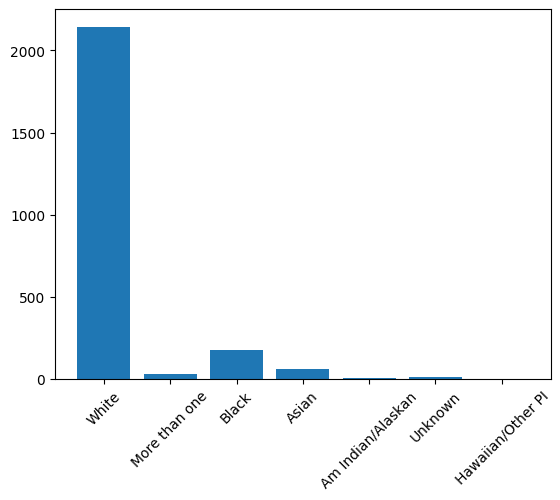

In [ ]:
# What is the race distribution for each unique patient?
# (see histogram, it is very white biased)

# races from the dataset
race_dict = {
    'White':0,
    'More than one':0,
    'Black':0,
    'Asian':0,
    'Am Indian/Alaskan':0,
    'Unknown':0,
    'Hawaiian/Other PI':0
}


for x in df_patients_first['PTRACCAT']:
  race_dict[x] += 1



plt.bar(race_dict.keys(), race_dict.values())

# Liezl's edits
# race_dict_readable = race_dict.copy()
# race_dict_readable["More than one"] = ">1"
plt.xticks(rotation=45)
print(race_dict)

{'0-8': 11, '8-12': 47, '12-14': 97, '14-16': 99, '16-20': 694, '20+': 1482}


<BarContainer object of 6 artists>

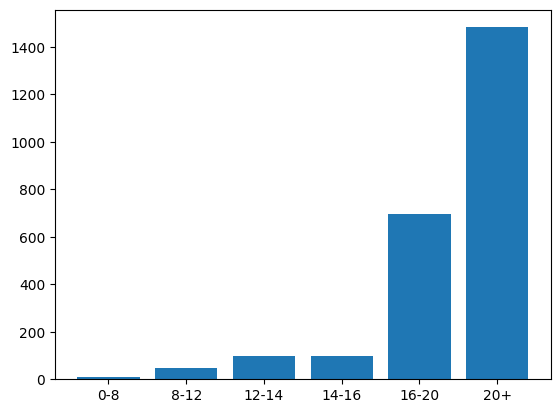

In [ ]:
# Histogram of education levels by most recent date
# (see results, but these are highly educated patients)

#bucketize
buckets = {
      '0-8': 0,
      '8-12': 0,
      '12-14':0,
      '14-16': 0,
      '16-20': 0,
      '20+':0
}
for x in df_patients_last['PTEDUCAT']:
  if x < 8:
    # middle school
    buckets['0-8'] += 1
  elif 8<x<12:
    # high school
    buckets['8-12'] += 1
  elif 12<x<14:
    # associates
    buckets['12-14'] += 1
  elif 14<x<16:
    # bachelors
    buckets['14-16'] += 1
  elif 16<x<20:
    # masters
    buckets['16-20'] += 1
  else:
    # doctors etc
    buckets['20+'] +=1

print(buckets)

plt.bar(buckets.keys(), buckets.values())

In [ ]:
# The Education levels begs a further question about education distribution of the control group vs the AD group

# Split the most recent diagnosis into healthy and any level of AD
#diagnosis_df = df_patients_last[]

df_patients_last.columns

Index(['RID', 'COLPROT', 'ORIGPROT', 'PTID', 'SITE', 'VISCODE', 'EXAMDATE',
       'DX_bl', 'AGE', 'PTGENDER',
       ...
       'PTAU_bl', 'FDG_bl', 'PIB_bl', 'AV45_bl', 'FBB_bl', 'Years_bl',
       'Month_bl', 'Month', 'M', 'update_stamp'],
      dtype='object', length=116)

{'Male': 1273, 'Female': 1157}


<BarContainer object of 2 artists>

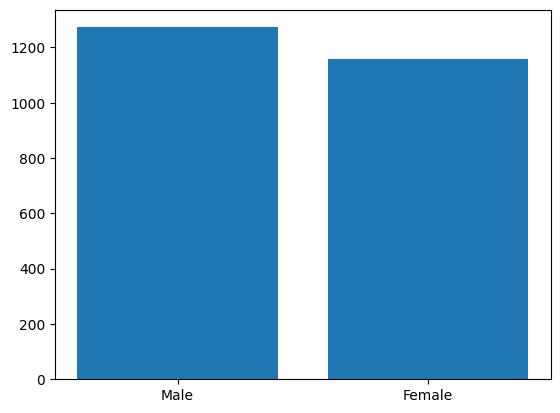

In [ ]:
# what is the gender distribution?
# (see bar chart below, it is fairly even)

genders = df_patients_last['PTGENDER'].unique()

genders_dict = dict(zip(genders, [0]*len(genders)))

for unique_pt_gender in df_patients_last['PTGENDER']:
  genders_dict[unique_pt_gender] += 1

print(genders_dict)

plt.bar(genders, genders_dict.values())

In [ ]:
# is this data from the USA? Does it match the population distribution of the US?
# answer: according to comment here (https://adni.loni.usc.edu/about) patients are recruited from the US




<BarContainer object of 3 artists>

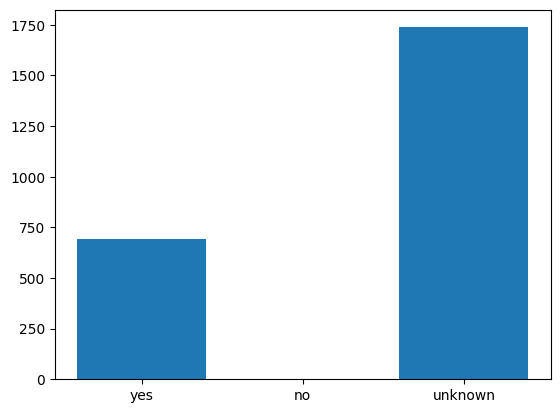

In [ ]:
# did this person get alzheimers?
# Basing it on a t-tau of >= 0.33 as the cutoff according to this site: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3181816/
# hot encode 1 means yes this person did and 0 means no they didn't
# ran into some data cleaning because the tau column has strings, nan, and even >1300 and <80 which I handled specifically

# set error for float comparison
allowed_error = 0.05

got_alzhiemers_df = df_patients_last[['PTID','TAU']].copy()

# add column to indicate
got_alzhiemers_df.insert(2, 'hasAlzheimers', np.nan)

hasAlzheimers_dict = {
    'yes':0,
    'no': 0,
    'unknown':0
}

for i in range(len(got_alzhiemers_df)-1):
  patient_tau = got_alzhiemers_df.loc[i, 'TAU']

  try:
    # try to cast the data to a float
    patient_tau = float(patient_tau)
  except:
    if(patient_tau == '>1300'):
      # patient has
      got_alzhiemers_df.loc[i, 'hasAlzheimers'] = True
      hasAlzheimers_dict['yes'] += 1
      continue
    elif(patient_tau == '<80'):
      # patient has
      got_alzhiemers_df.loc[i, 'hasAlzheimers'] = True
      hasAlzheimers_dict['yes'] += 1
      continue


  # firstly check if it is nan
  if(np.isnan(patient_tau)):
    # patient tau is nan, so keep nan
    got_alzhiemers_df.loc[i, 'hasAlzheimers'] = np.nan
    hasAlzheimers_dict['unknown'] += 1

  else:
    # patient tau is a number, so proceed testing it

    if(abs(float(patient_tau)-0.33) <= allowed_error):
      #patient doesn't have
      got_alzhiemers_df.loc[i, 'hasAlzheimers'] = False
      hasAlzheimers_dict['no'] += 1
    else:
      # patient has
      got_alzhiemers_df.loc[i, 'hasAlzheimers'] = True
      hasAlzheimers_dict['yes'] += 1


# graph the totals
plt.bar(hasAlzheimers_dict.keys(), hasAlzheimers_dict.values())




In [ ]:
np.isnan(float('189'))
float(300.1)

300.1

In [ ]:

# How long were our patients in the study?
# Group by trial (what year does it come from?). To synchronize with Joshua and Liezl
# ability to put the pieces together -- which trial are we using
# See legend from Liezl (in teams)
# what sampling method did they use
# subject vs patient: find more documentation for what they mean for these labels
# Is it the same patient multiple times over the years? (because there should only be 5,000 something total)
# subject ID
# Dr. Talbert ability to meet with us


In [ ]:
# Is the research group based off most recent visit? (why isn't someone jumping between the group)
# also see the DX_bl to determine their group
# how are they tracking someone who comes in without alzheimers and develops it over time


